In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [6]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
import skimage
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage.filters import convolve
from skimage import data, io, filters
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.models import load_model
from keras.regularizers import l1,l2,L1L2
from tensorflow.keras import regularizers
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

C:\Users\HP\AppData\Local\Temp\ipykernel_22244\1071619045.py:21: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve


In [7]:
Indian_Sign_Main_Path = Path(r"C:\Users\HP\Downloads\sign_language_data_set\Indian")

In [8]:
#Sign_JPG = list(Indian_Sign_Main_Path.glob(r"*/*.jpg"))
Sign_JPG = list(Indian_Sign_Main_Path.rglob("*.jpg")) + list(Indian_Sign_Main_Path.rglob("*.JPG"))
print("Total images found:", len(Sign_JPG))

Total images found: 85490


In [9]:
#Sign_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Sign_JPG))
Sign_Labels = [p.parent.name for p in Sign_JPG]

In [10]:
Sign_JPG_Series = pd.Series(Sign_JPG,name="JPG").astype(str)
Sign_Labels_Series = pd.Series(Sign_Labels,name="CATEGORY")

In [11]:
#Main_Sign_Data = pd.concat([Sign_JPG_Series,Sign_Labels_Series],axis=1)
Main_Sign_Data = pd.concat([Sign_JPG_Series.reset_index(drop=True),
                            Sign_Labels_Series.reset_index(drop=True)], axis=1)

In [12]:
print(Main_Sign_Data.head(-1))

                                                     JPG CATEGORY
0      C:\Users\HP\Downloads\sign_language_data_set\I...        1
1      C:\Users\HP\Downloads\sign_language_data_set\I...        1
2      C:\Users\HP\Downloads\sign_language_data_set\I...        1
3      C:\Users\HP\Downloads\sign_language_data_set\I...        1
4      C:\Users\HP\Downloads\sign_language_data_set\I...        1
...                                                  ...      ...
85484  C:\Users\HP\Downloads\sign_language_data_set\I...        Z
85485  C:\Users\HP\Downloads\sign_language_data_set\I...        Z
85486  C:\Users\HP\Downloads\sign_language_data_set\I...        Z
85487  C:\Users\HP\Downloads\sign_language_data_set\I...        Z
85488  C:\Users\HP\Downloads\sign_language_data_set\I...        Z

[85489 rows x 2 columns]


In [13]:
Main_Sign_Data = Main_Sign_Data.sample(frac=1).reset_index(drop=True)

In [14]:
print(Main_Sign_Data.head(-1))

                                                     JPG CATEGORY
0      C:\Users\HP\Downloads\sign_language_data_set\I...        4
1      C:\Users\HP\Downloads\sign_language_data_set\I...        M
2      C:\Users\HP\Downloads\sign_language_data_set\I...        J
3      C:\Users\HP\Downloads\sign_language_data_set\I...        Z
4      C:\Users\HP\Downloads\sign_language_data_set\I...        Y
...                                                  ...      ...
85484  C:\Users\HP\Downloads\sign_language_data_set\I...        O
85485  C:\Users\HP\Downloads\sign_language_data_set\I...        W
85486  C:\Users\HP\Downloads\sign_language_data_set\I...        E
85487  C:\Users\HP\Downloads\sign_language_data_set\I...        U
85488  C:\Users\HP\Downloads\sign_language_data_set\I...        T

[85489 rows x 2 columns]


In [15]:
def simple_vision(img_path):
    Picking_Img = cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2RGB)
    
    return Picking_Img

In [16]:
def threshold_vision(img_path):
    Picking_Img = simple_vision(img_path)
    Gray_Img = cv2.cvtColor(Picking_Img,cv2.COLOR_RGB2GRAY)
    _,threshold_Img = cv2.threshold(Gray_Img,90,255,cv2.THRESH_BINARY_INV)
    
    return threshold_Img

In [17]:
def canny_vision(img_path):
    Threshold_Img = threshold_vision(img_path)
    Canny_Img = cv2.Canny(Threshold_Img,10,100)
    
    return Canny_Img

In [18]:
def skeleton_morph_vision(img_path):
    Picking_Img = simple_vision(img_path)
    Gray_Img = cv2.cvtColor(Picking_Img,cv2.COLOR_RGB2GRAY)
    _,Threshold_Img = cv2.threshold(Gray_Img,90,255,cv2.THRESH_BINARY_INV)
    
    Array_Img = np.array(Gray_Img > Threshold_Img).astype(int)
    Skeleton_Img = skimage.morphology.skeletonize(Array_Img)
    
    return Skeleton_Img

In [19]:
print(len(Main_Sign_Data["JPG"]))

85490


In [20]:
print(Main_Sign_Data.head())
print(Main_Sign_Data.columns)

                                                 JPG CATEGORY
0  C:\Users\HP\Downloads\sign_language_data_set\I...        4
1  C:\Users\HP\Downloads\sign_language_data_set\I...        M
2  C:\Users\HP\Downloads\sign_language_data_set\I...        J
3  C:\Users\HP\Downloads\sign_language_data_set\I...        Z
4  C:\Users\HP\Downloads\sign_language_data_set\I...        Y
Index(['JPG', 'CATEGORY'], dtype='object')


In [21]:
print(Main_Sign_Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85490 entries, 0 to 85489
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   JPG       85490 non-null  object
 1   CATEGORY  85490 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB
None


In [22]:
print(Main_Sign_Data["JPG"].isnull().sum())

0


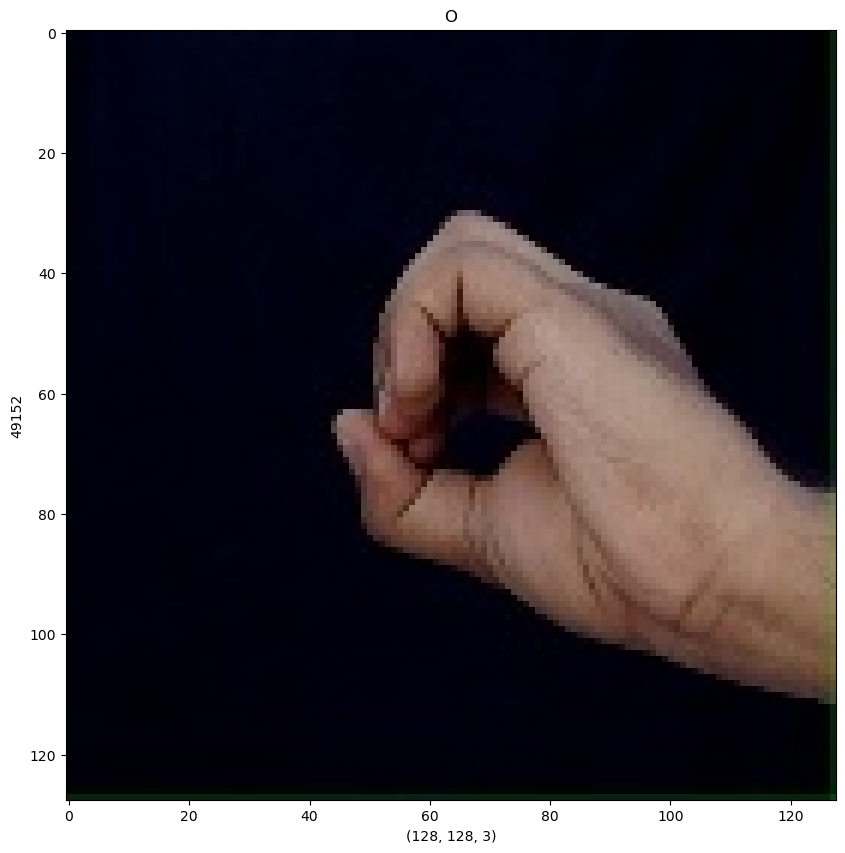

In [23]:
figure = plt.figure(figsize=(10,10))

Image_Sign = simple_vision(Main_Sign_Data["JPG"][33])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][33])
plt.imshow(Image_Sign)

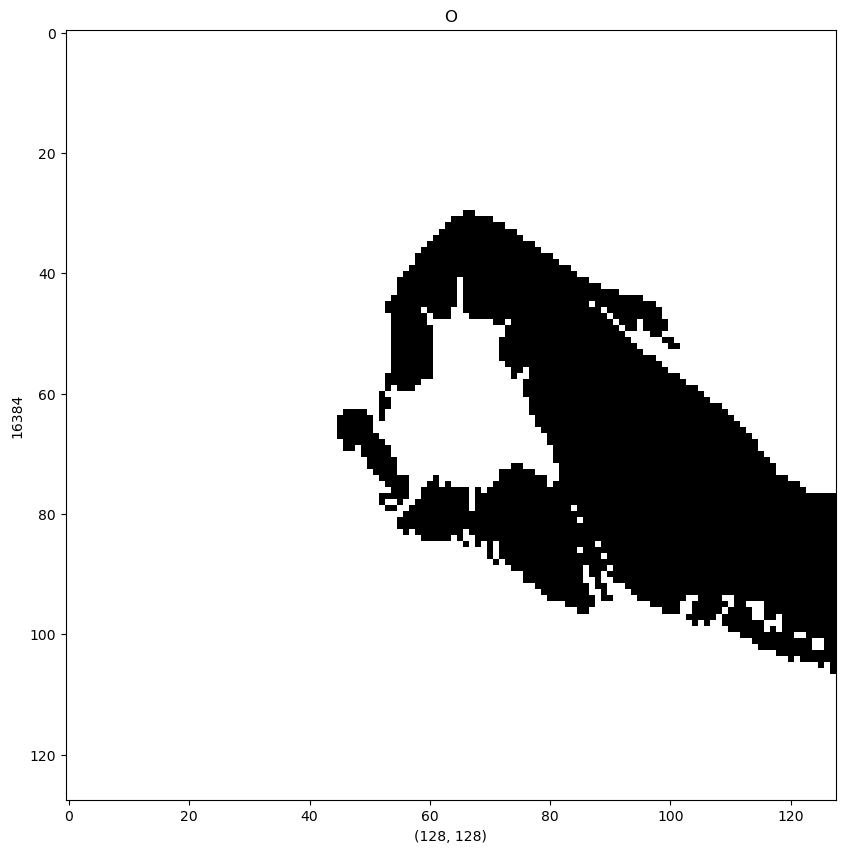

In [24]:
figure = plt.figure(figsize=(10,10))

Image_Sign = threshold_vision(Main_Sign_Data["JPG"][33])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][33])
plt.imshow(Image_Sign,cmap="gray")

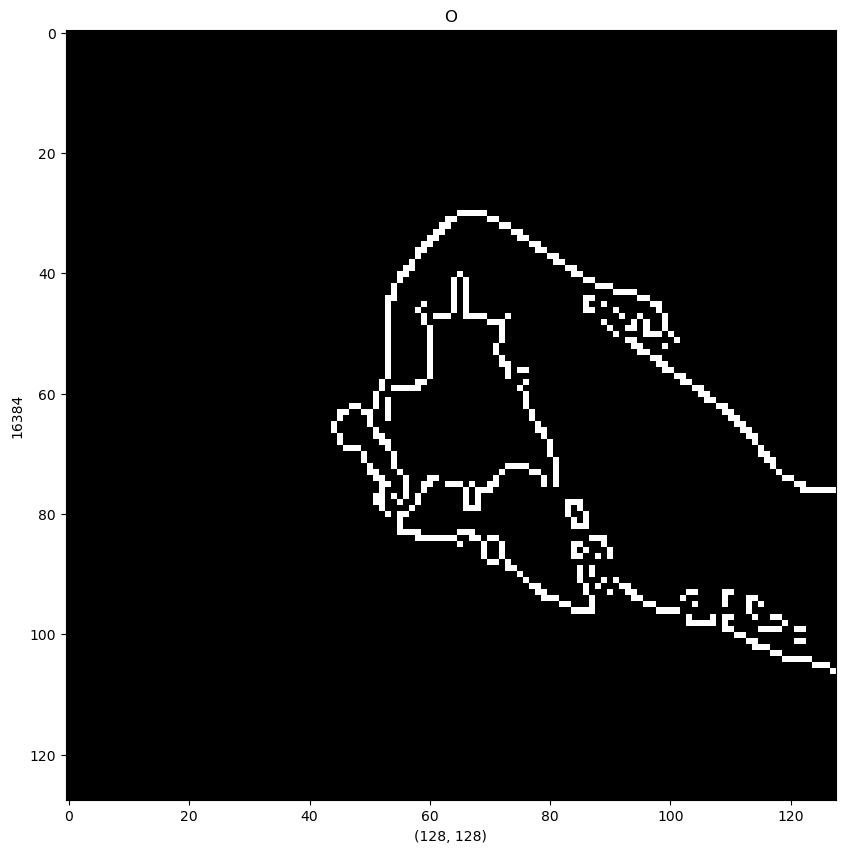

In [25]:
figure = plt.figure(figsize=(10,10))

Image_Sign = canny_vision(Main_Sign_Data["JPG"][33])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][33])
plt.imshow(Image_Sign,cmap="gray")

Text(0.5, 1.0, 'O')

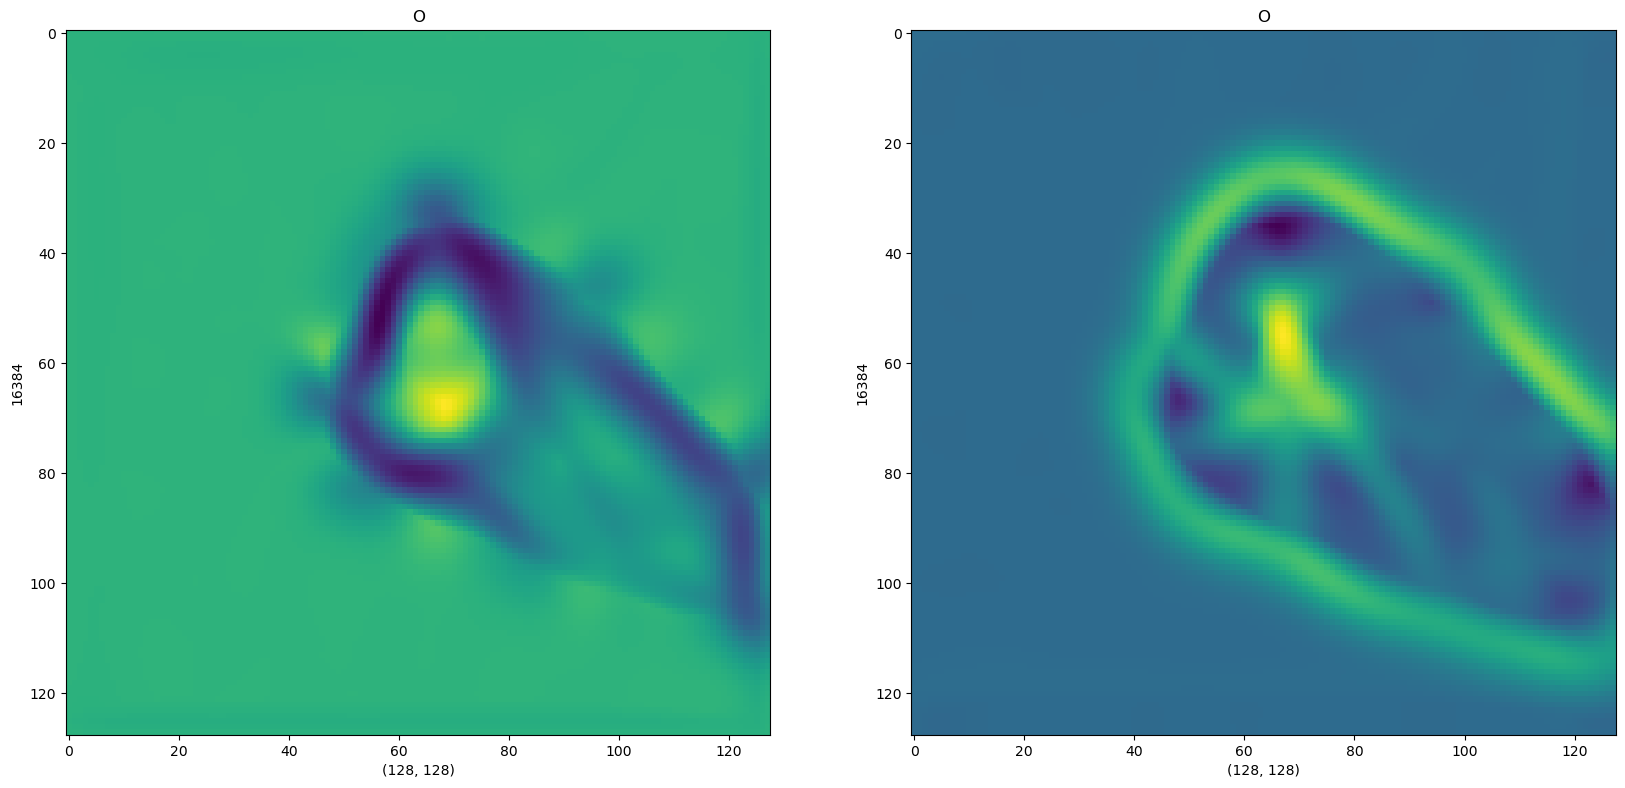

In [26]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(20,20))

Example_Image = cv2.cvtColor(cv2.imread(Main_Sign_Data["JPG"][33]),cv2.COLOR_BGR2GRAY)

Hessian_Mat = hessian_matrix(Example_Image,sigma=5,order="rc")
max_S,min_S = hessian_matrix_eigvals(Hessian_Mat)

axis[0].imshow(min_S)
axis[0].set_xlabel(min_S.shape)
axis[0].set_ylabel(min_S.size)
axis[0].set_title(Main_Sign_Data["CATEGORY"][33])
axis[1].imshow(max_S)
axis[1].set_xlabel(max_S.shape)
axis[1].set_ylabel(max_S.size)
axis[1].set_title(Main_Sign_Data["CATEGORY"][33])

Text(0.5, 1.0, 'O')

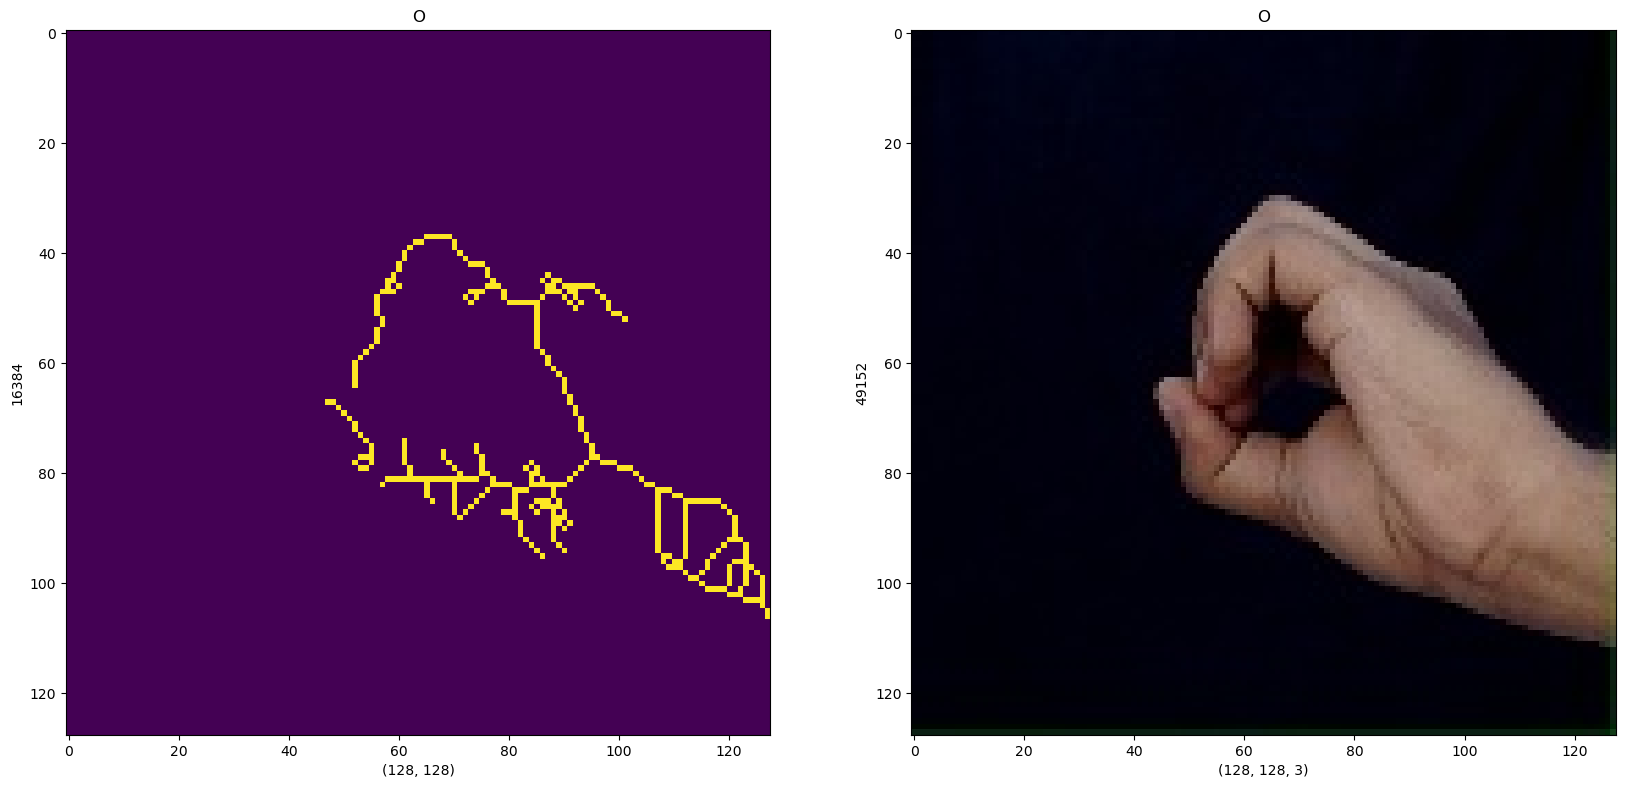

In [27]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(20,20))

Skel_Img = skeleton_morph_vision(Main_Sign_Data["JPG"][33])
Simple_Img = simple_vision(Main_Sign_Data["JPG"][33])

axis[0].imshow(Skel_Img)
axis[0].set_xlabel(Skel_Img.shape)
axis[0].set_ylabel(Skel_Img.size)
axis[0].set_title(Main_Sign_Data["CATEGORY"][33])
axis[1].imshow(Simple_Img)
axis[1].set_xlabel(Simple_Img.shape)
axis[1].set_ylabel(Simple_Img.size)
axis[1].set_title(Main_Sign_Data["CATEGORY"][33])

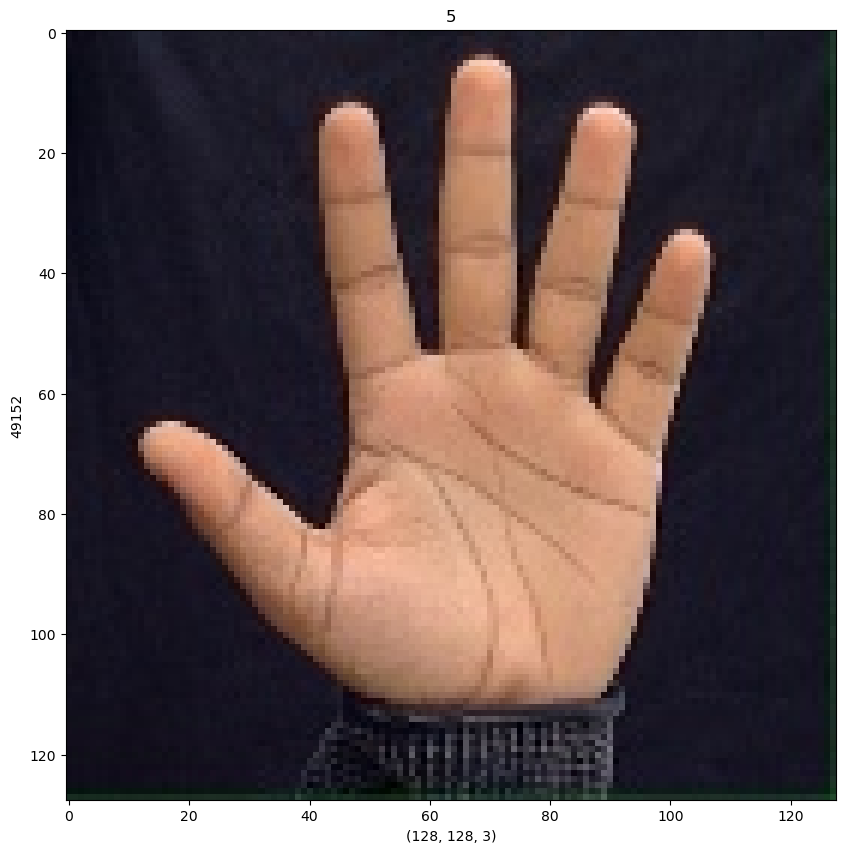

In [28]:
figure = plt.figure(figsize=(10,10))

Image_Sign = simple_vision(Main_Sign_Data["JPG"][41113])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][41113])
plt.imshow(Image_Sign)

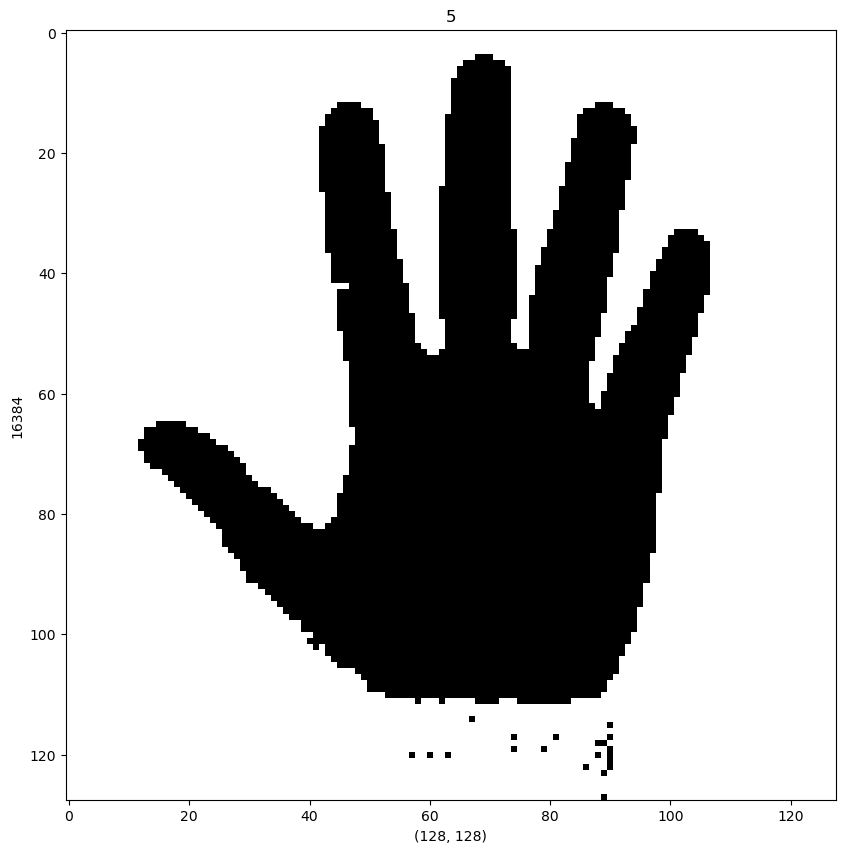

In [29]:
figure = plt.figure(figsize=(10,10))

Image_Sign = threshold_vision(Main_Sign_Data["JPG"][41113])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][41113])
plt.imshow(Image_Sign,cmap="gray")

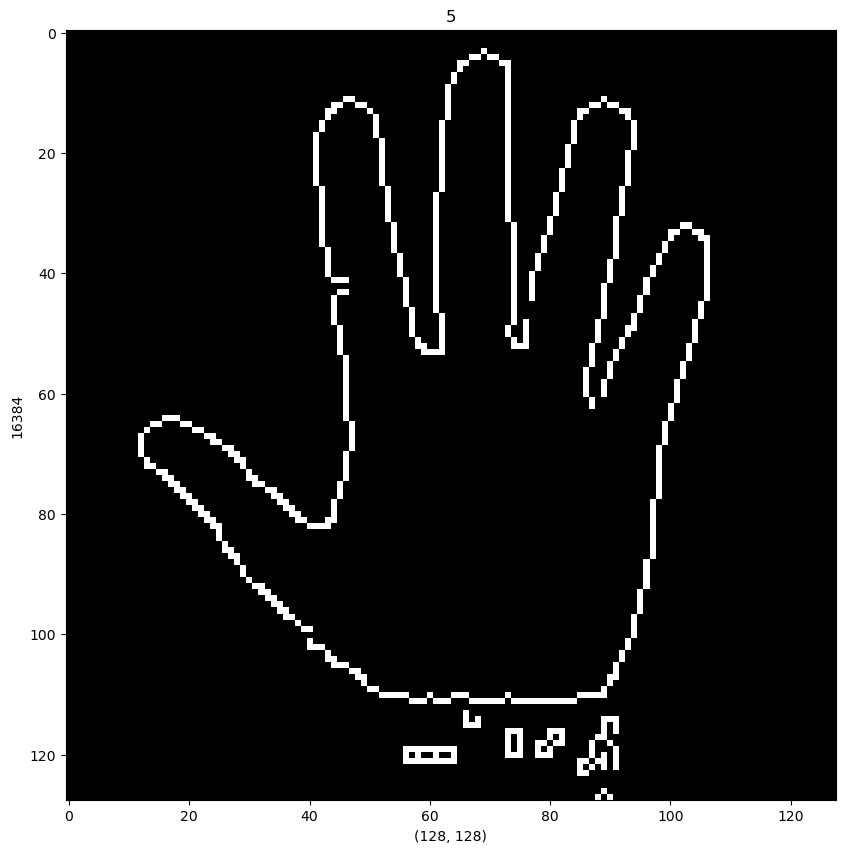

In [30]:
figure = plt.figure(figsize=(10,10))

Image_Sign = canny_vision(Main_Sign_Data["JPG"][41113])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][41113])
plt.imshow(Image_Sign,cmap="gray")

Text(0.5, 1.0, '5')

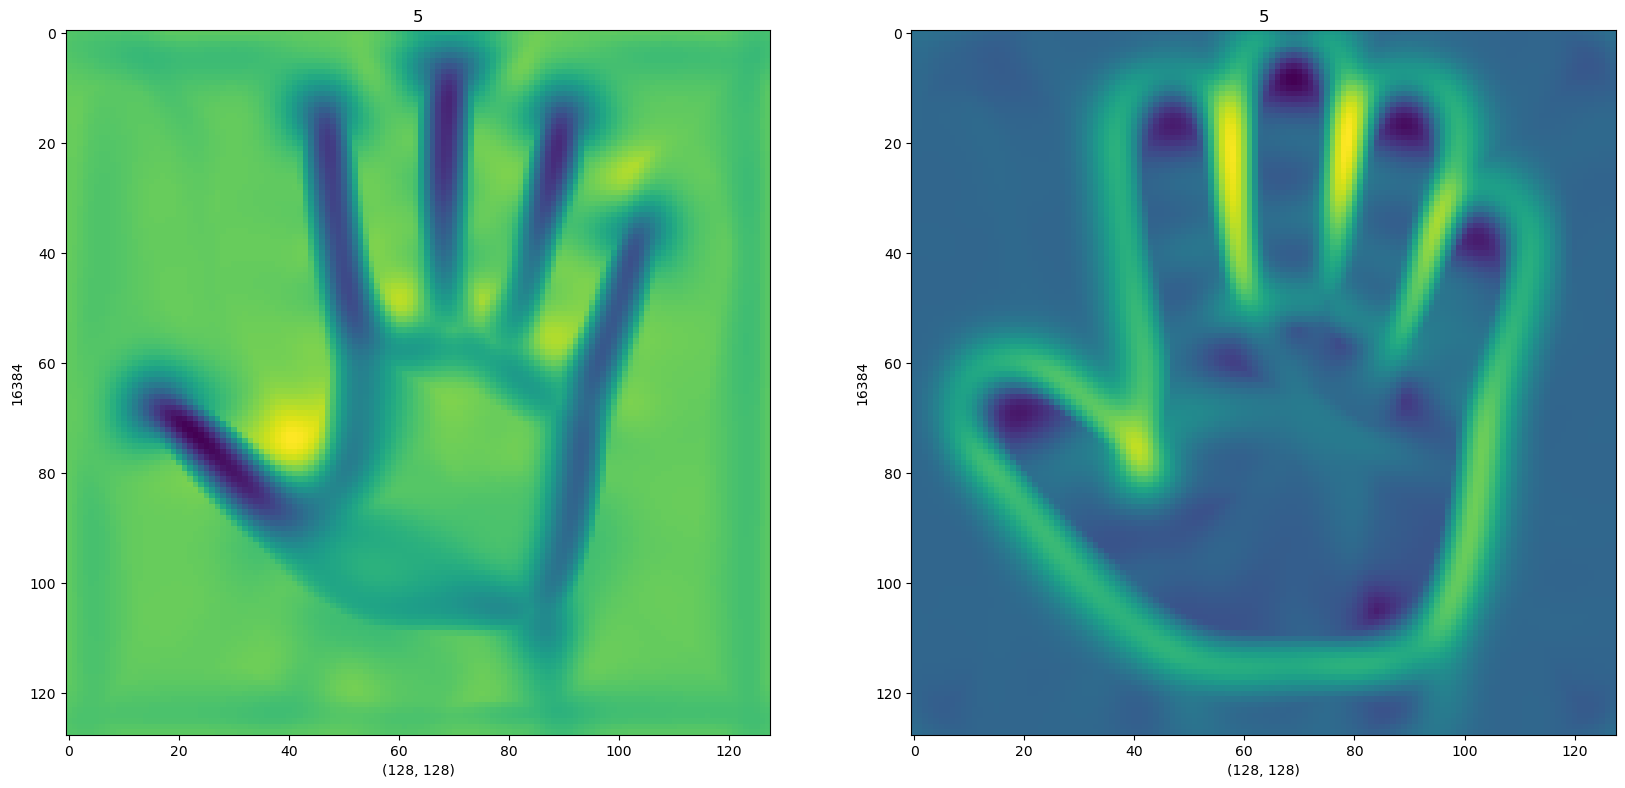

In [31]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(20,20))

Example_Image = cv2.cvtColor(cv2.imread(Main_Sign_Data["JPG"][41113]),cv2.COLOR_BGR2GRAY)

Hessian_Mat = hessian_matrix(Example_Image,sigma=5,order="rc")
max_S,min_S = hessian_matrix_eigvals(Hessian_Mat)

axis[0].imshow(min_S)
axis[0].set_xlabel(min_S.shape)
axis[0].set_ylabel(min_S.size)
axis[0].set_title(Main_Sign_Data["CATEGORY"][41113])
axis[1].imshow(max_S)
axis[1].set_xlabel(max_S.shape)
axis[1].set_ylabel(max_S.size)
axis[1].set_title(Main_Sign_Data["CATEGORY"][41113])

Text(0.5, 1.0, '5')

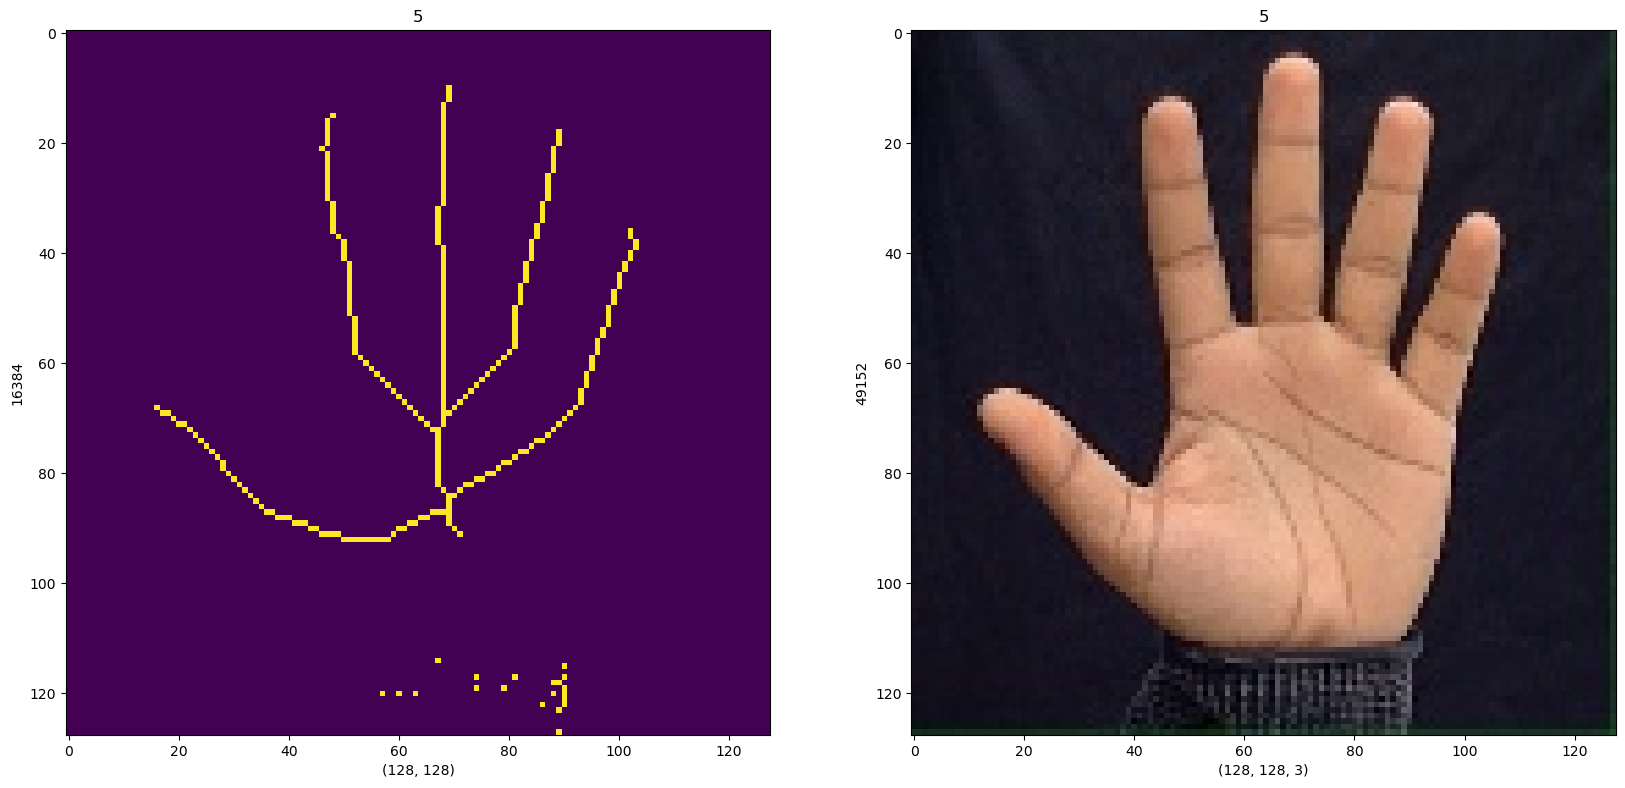

In [32]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(20,20))

Skel_Img = skeleton_morph_vision(Main_Sign_Data["JPG"][41113])
Simple_Img = simple_vision(Main_Sign_Data["JPG"][41113])

axis[0].imshow(Skel_Img)
axis[0].set_xlabel(Skel_Img.shape)
axis[0].set_ylabel(Skel_Img.size)
axis[0].set_title(Main_Sign_Data["CATEGORY"][41113])
axis[1].imshow(Simple_Img)
axis[1].set_xlabel(Simple_Img.shape)
axis[1].set_ylabel(Simple_Img.size)
axis[1].set_title(Main_Sign_Data["CATEGORY"][41113])

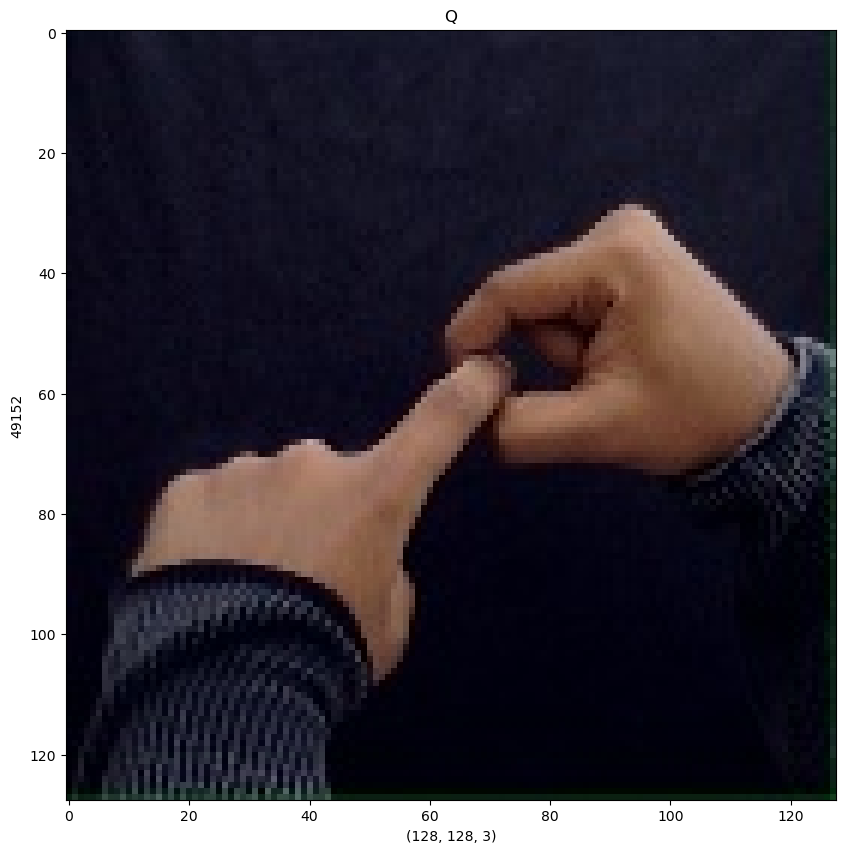

In [33]:
figure = plt.figure(figsize=(10,10))

Image_Sign = simple_vision(Main_Sign_Data["JPG"][22213])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][22213])
plt.imshow(Image_Sign)

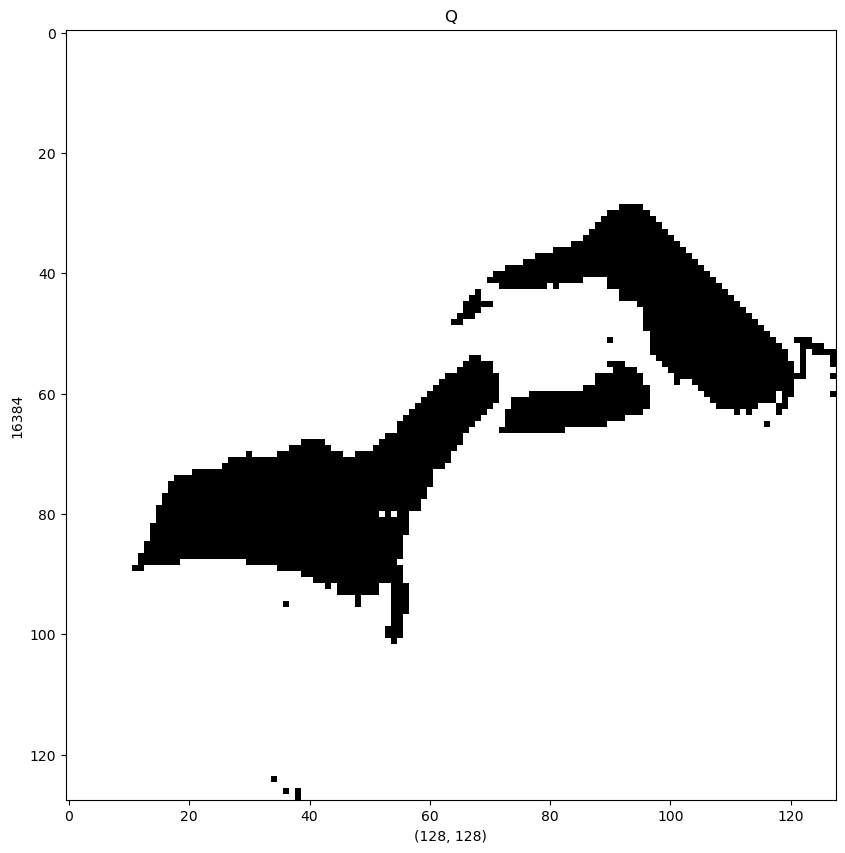

In [34]:
figure = plt.figure(figsize=(10,10))

Image_Sign = threshold_vision(Main_Sign_Data["JPG"][22213])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][22213])
plt.imshow(Image_Sign,cmap="gray")

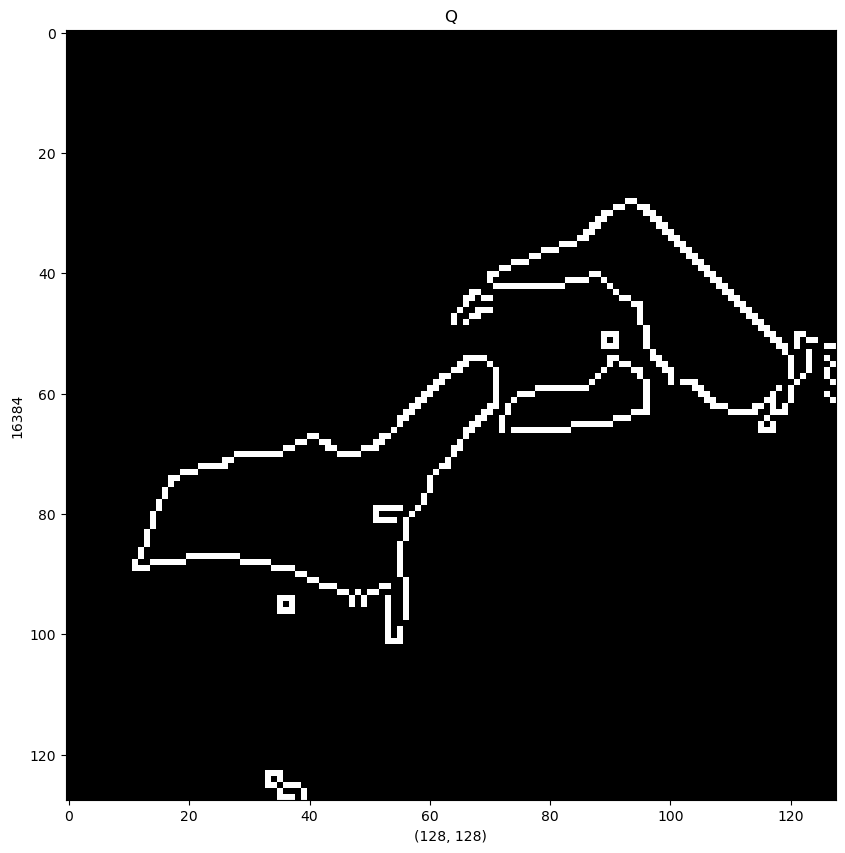

In [35]:
figure = plt.figure(figsize=(10,10))

Image_Sign = canny_vision(Main_Sign_Data["JPG"][22213])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][22213])
plt.imshow(Image_Sign,cmap="gray")

Text(0.5, 1.0, 'Q')

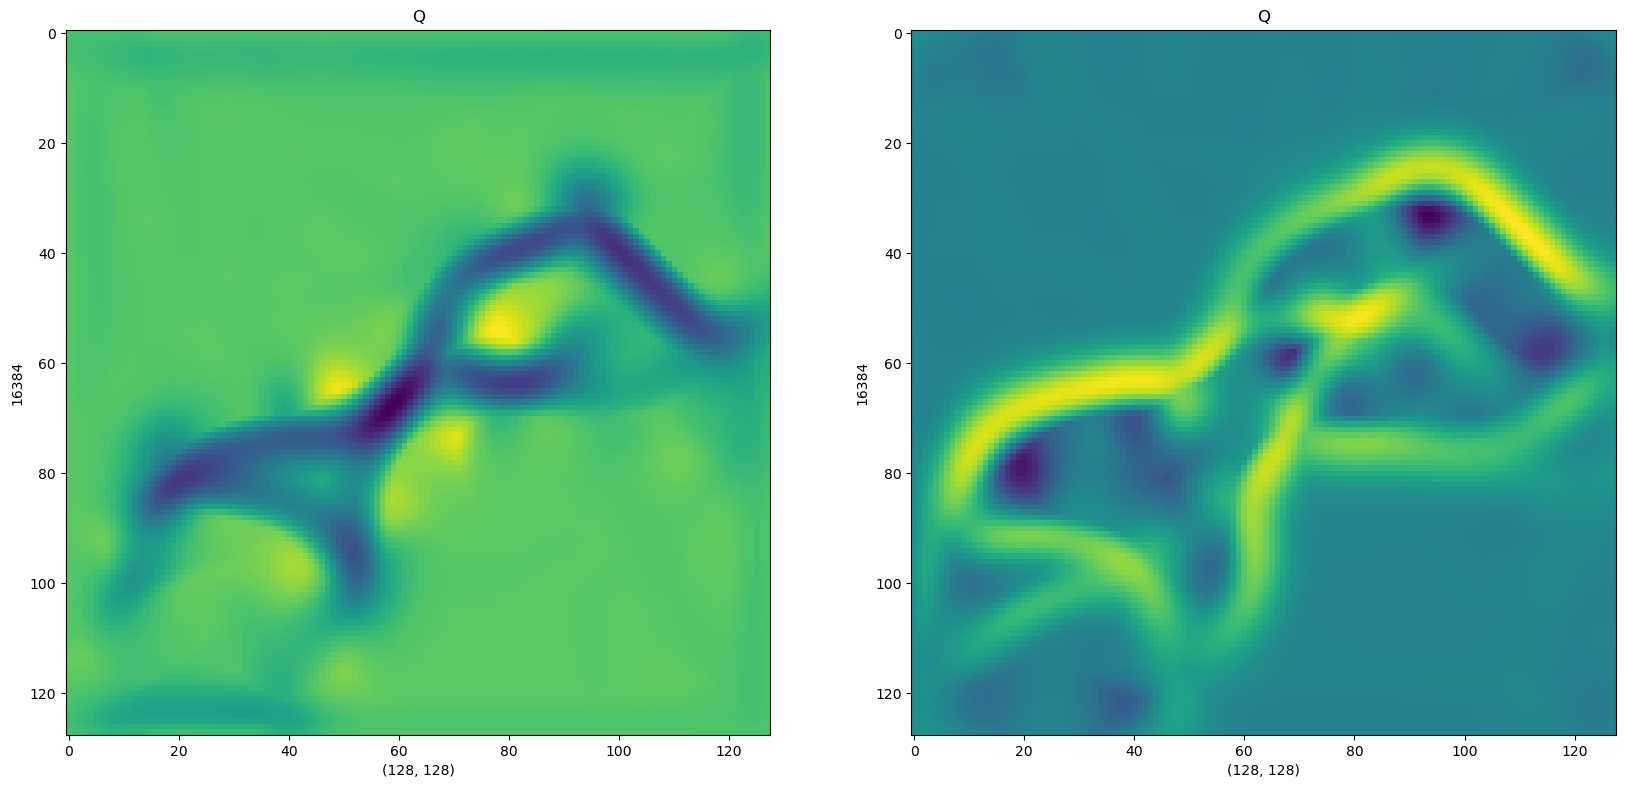

In [36]:

figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(20,20))

Example_Image = cv2.cvtColor(cv2.imread(Main_Sign_Data["JPG"][22213]),cv2.COLOR_BGR2GRAY)

Hessian_Mat = hessian_matrix(Example_Image,sigma=5,order="rc")
max_S,min_S = hessian_matrix_eigvals(Hessian_Mat)

axis[0].imshow(min_S)
axis[0].set_xlabel(min_S.shape)
axis[0].set_ylabel(min_S.size)
axis[0].set_title(Main_Sign_Data["CATEGORY"][22213])
axis[1].imshow(max_S)
axis[1].set_xlabel(max_S.shape)
axis[1].set_ylabel(max_S.size)
axis[1].set_title(Main_Sign_Data["CATEGORY"][22213])

Text(0.5, 1.0, 'Q')

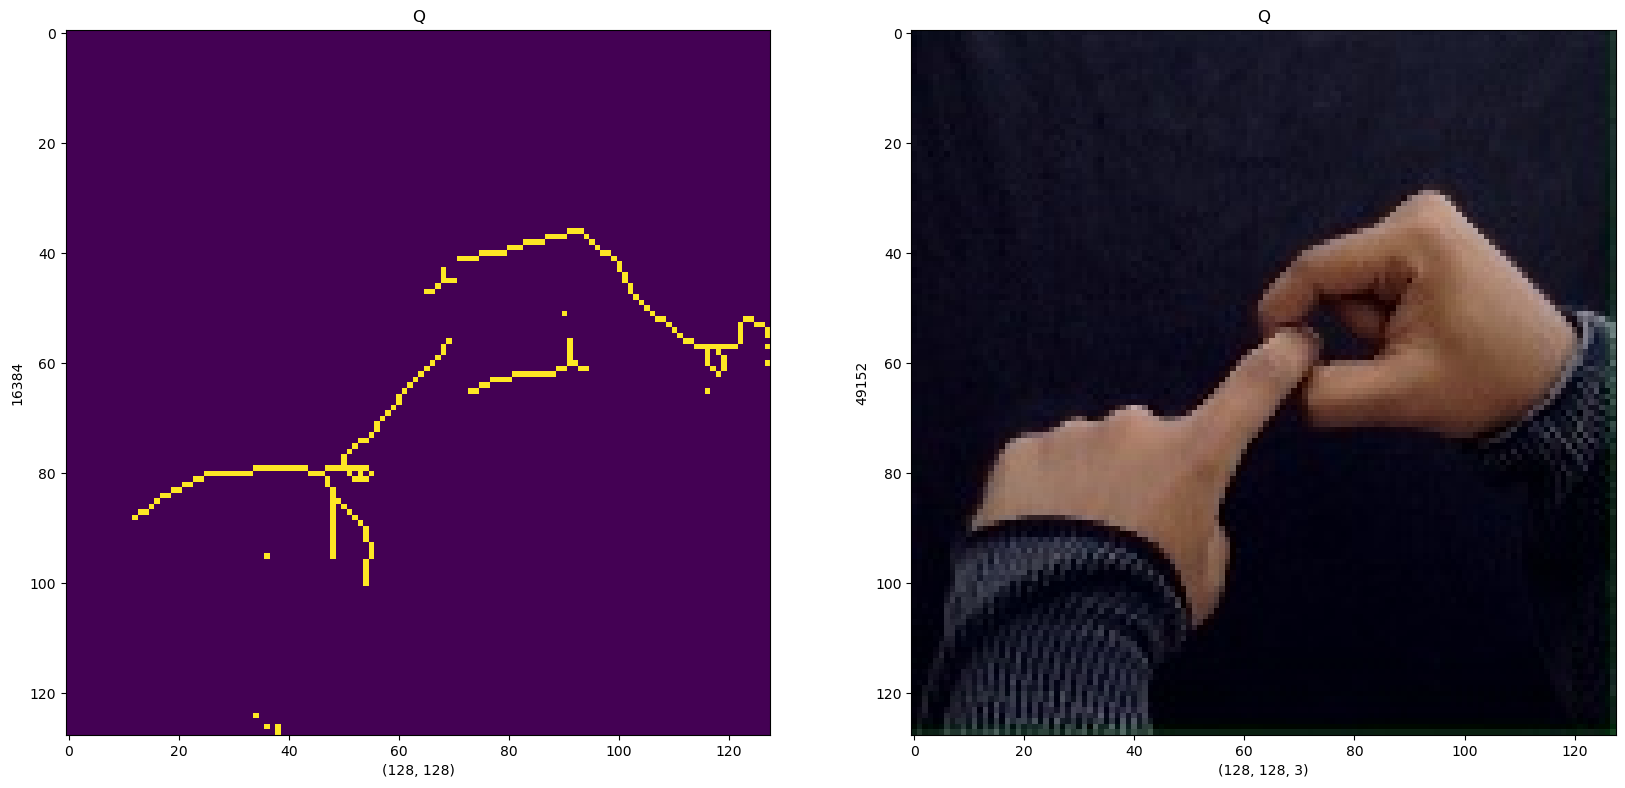

In [37]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(20,20))

Skel_Img = skeleton_morph_vision(Main_Sign_Data["JPG"][22213])
Simple_Img = simple_vision(Main_Sign_Data["JPG"][22213])

axis[0].imshow(Skel_Img)
axis[0].set_xlabel(Skel_Img.shape)
axis[0].set_ylabel(Skel_Img.size)
axis[0].set_title(Main_Sign_Data["CATEGORY"][22213])
axis[1].imshow(Simple_Img)
axis[1].set_xlabel(Simple_Img.shape)
axis[1].set_ylabel(Simple_Img.size)
axis[1].set_title(Main_Sign_Data["CATEGORY"][22213])

In [38]:
X_Train,X_Test = train_test_split(Main_Sign_Data,train_size=0.9,random_state=123,shuffle=True)

In [39]:
print(X_Train.shape)
print(X_Test.shape)

(76941, 2)
(8549, 2)


In [40]:
print(type(X_Train))
print(type(X_Test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [41]:
Train_IMG_Generator = ImageDataGenerator(rescale=1./255,
                                        zoom_range=0.5,
                                        shear_range=0.5,
                                        brightness_range=[0.6,1.0],
                                        rotation_range=35,
                                        width_shift_range=0.1,
                                        height_shift_range=0.1,
                                        vertical_flip=True,
                                         featurewise_std_normalization=False,
                                         samplewise_center=False,
                                         samplewise_std_normalization=False,
                                        fill_mode="nearest",
                                        validation_split=0.1)

In [42]:
Test_IMG_Generator = ImageDataGenerator(rescale=1./255)

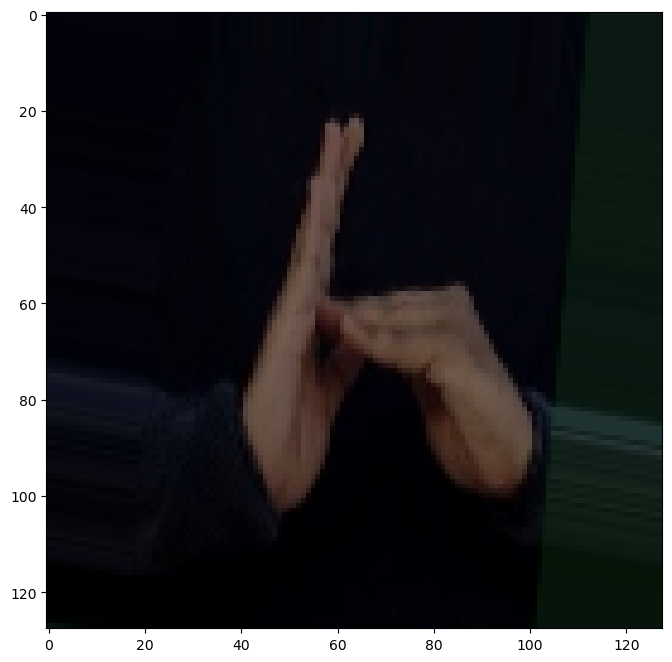

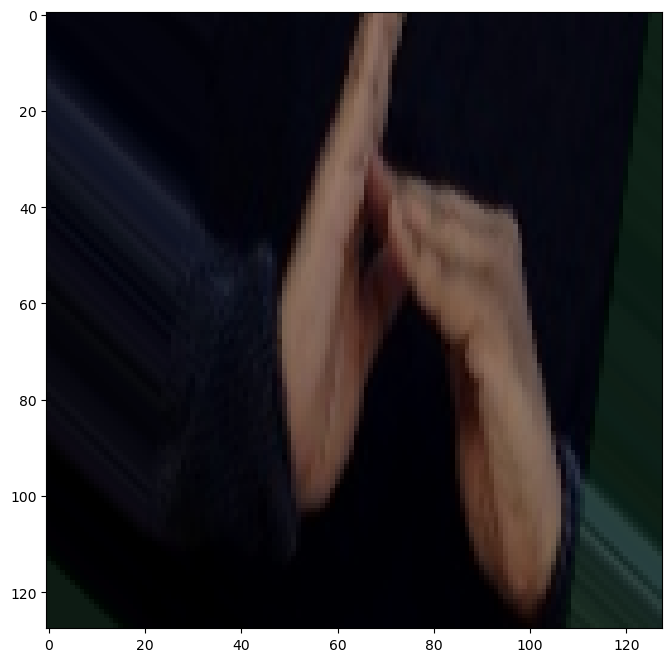

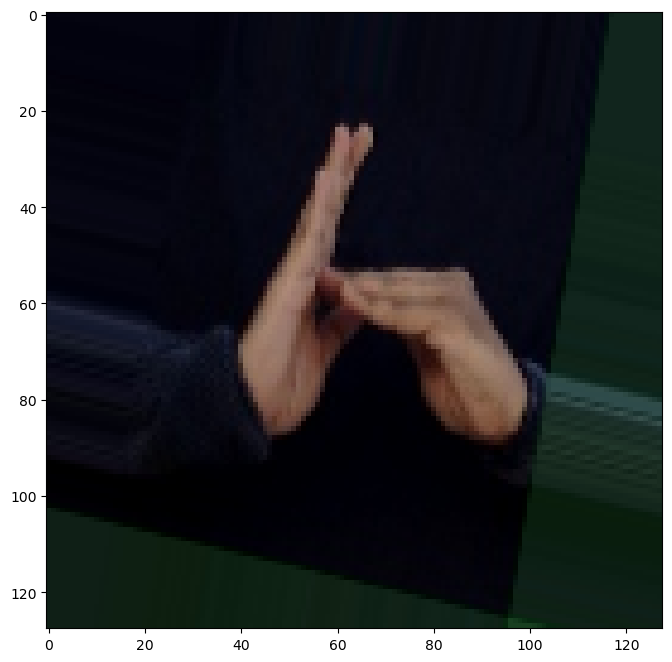

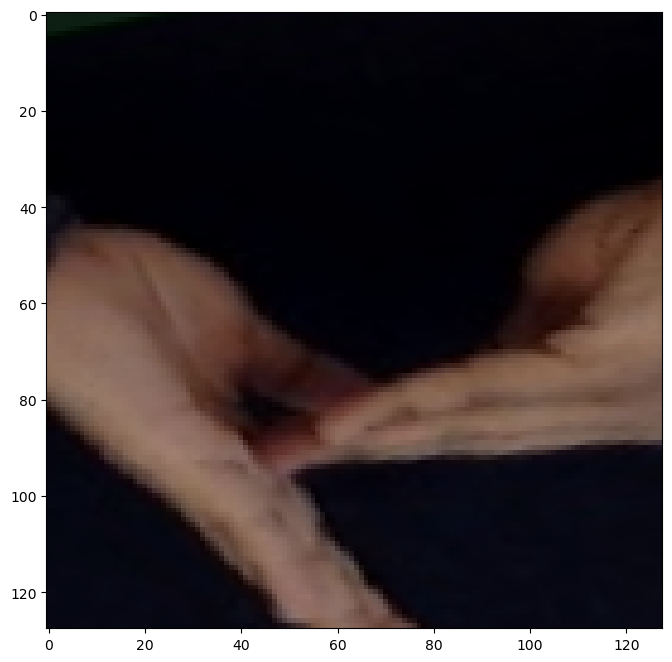

In [43]:
Example_Img = simple_vision(X_Train.JPG[3])
Example_Img = Example_Img.reshape((1,) + Example_Img.shape)

i = 0 

for batch in Train_IMG_Generator.flow(Example_Img,batch_size=32):
    
    figure = plt.figure(figsize=(8,8))
    plt.imshow(image.img_to_array(batch[0]))
    
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

In [44]:
Train_Set = Train_IMG_Generator.flow_from_dataframe(dataframe=X_Train,
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   batch_size=32,
                                                   class_mode="categorical",
                                                   color_mode="grayscale",
                                                   subset="training")

Found 69247 validated image filenames belonging to 35 classes.


In [45]:
Validation_Set = Train_IMG_Generator.flow_from_dataframe(dataframe=X_Train,
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   batch_size=32,
                                                   class_mode="categorical",
                                                   color_mode="grayscale",
                                                   subset="validation")

Found 7694 validated image filenames belonging to 35 classes.


In [46]:
Test_Set = Test_IMG_Generator.flow_from_dataframe(dataframe=X_Test,
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   batch_size=32,
                                                   class_mode="categorical",
                                                   color_mode="grayscale",
                                                   shuffle=False)

Found 8549 validated image filenames belonging to 35 classes.


In [47]:
print("TRAIN: ")
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])
print(Train_Set.image_shape)
print("---"*20)
print("VALIDATION: ")
print(Validation_Set.class_indices)
print(Validation_Set.classes[0:5])
print(Validation_Set.image_shape)
print("---"*20)
print("TEST: ")
print(Test_Set.class_indices)
print(Test_Set.classes[0:5])
print(Test_Set.image_shape)

TRAIN: 
{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, 'A': 9, 'B': 10, 'C': 11, 'D': 12, 'E': 13, 'F': 14, 'G': 15, 'H': 16, 'I': 17, 'J': 18, 'K': 19, 'L': 20, 'M': 21, 'N': 22, 'O': 23, 'P': 24, 'Q': 25, 'R': 26, 'S': 27, 'T': 28, 'U': 29, 'V': 30, 'W': 31, 'X': 32, 'Y': 33, 'Z': 34}
[21, 28, 27, 2, 21]
(256, 256, 1)
------------------------------------------------------------
VALIDATION: 
{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, 'A': 9, 'B': 10, 'C': 11, 'D': 12, 'E': 13, 'F': 14, 'G': 15, 'H': 16, 'I': 17, 'J': 18, 'K': 19, 'L': 20, 'M': 21, 'N': 22, 'O': 23, 'P': 24, 'Q': 25, 'R': 26, 'S': 27, 'T': 28, 'U': 29, 'V': 30, 'W': 31, 'X': 32, 'Y': 33, 'Z': 34}
[13, 3, 19, 23, 6]
(256, 256, 1)
------------------------------------------------------------
TEST: 
{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, 'A': 9, 'B': 10, 'C': 11, 'D': 12, 'E': 13, 'F': 14, 'G': 15, 'H': 16, 'I': 17, 'J': 18, 'K': 19, 

In [48]:
COMPILE_OPTIMIZER = "adam"
COMPILE_LOSS = "categorical_crossentropy"
COMPILE_METRICS = ["accuracy"]
INPUT_DIM = (256,256,1)
OUTPUT_DIM = 35

In [49]:
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=True,
    filepath="./modelcheck.weights.h5"  # Ensure the filename ends with .weights.h5
)

In [50]:
Model = Sequential()

Model.add(Conv2D(24,(3,3),activation="relu",input_shape=INPUT_DIM))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
Model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))
Model.add(Conv2D(256,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Flatten())
Model.add(Dense(2352,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(OUTPUT_DIM,activation="softmax"))

In [51]:
Model.compile(optimizer=COMPILE_OPTIMIZER,loss=COMPILE_LOSS,metrics=COMPILE_METRICS)

In [52]:
CNN_Model = Model.fit(Train_Set,
                      validation_data=Validation_Set,
                      callbacks=[Early_Stopper,Checkpoint_Model],
                      epochs=3)

Epoch 1/3
2164/2164 ━━━━━━━━━━━━━━━━━━━━ 2385s 1s/step - accuracy: 0.6275 - loss: 1.3037 - val_accuracy: 0.8949 - val_loss: 0.5081
Epoch 2/3
2164/2164 ━━━━━━━━━━━━━━━━━━━━ 2496s 1s/step - accuracy: 0.9635 - loss: 0.1166 - val_accuracy: 0.9344 - val_loss: 0.2667
Epoch 3/3
2164/2164 ━━━━━━━━━━━━━━━━━━━━ 22010s 10s/step - accuracy: 0.9768 - loss: 0.0778 - val_accuracy: 0.9501 - val_loss: 0.2770


In [53]:
import keras.saving

# Saving the model using keras.saving.save_model
keras.saving.save_model(Model, 'my_model.keras')

<Axes: >

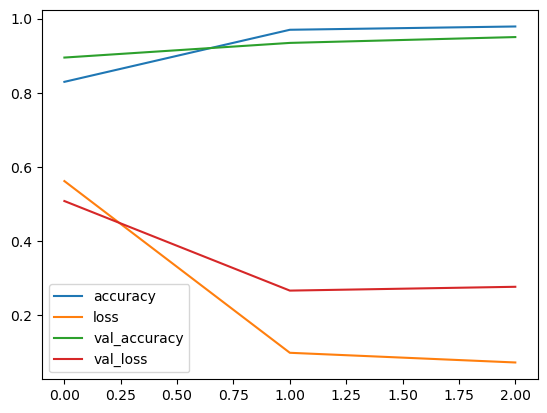

In [54]:
Grap_Data = pd.DataFrame(CNN_Model.history)
Grap_Data.plot()

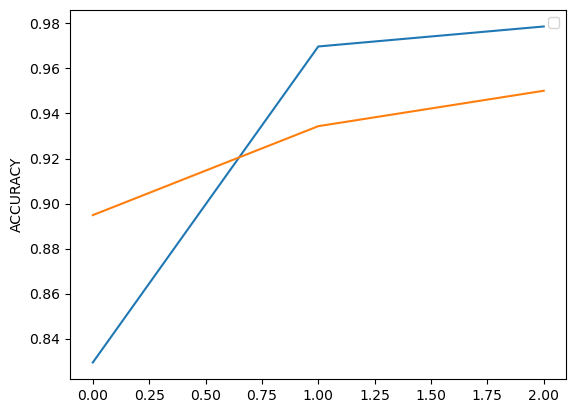

In [55]:
plt.plot(CNN_Model.history["accuracy"])
plt.plot(CNN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

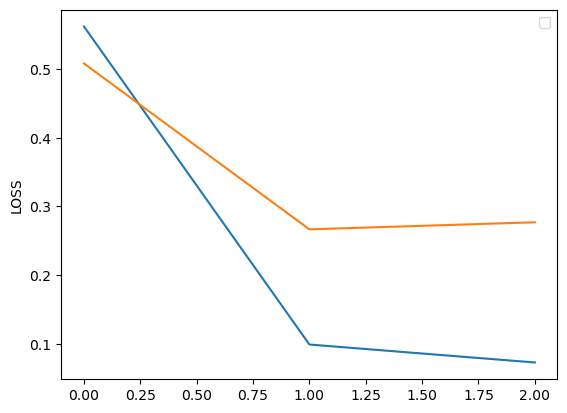

In [56]:
plt.plot(CNN_Model.history["loss"])
plt.plot(CNN_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

In [57]:
Model_Results = Model.evaluate(Test_Set)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

268/268 ━━━━━━━━━━━━━━━━━━━━ 170s 635ms/step - accuracy: 0.9152 - loss: 0.2618
LOSS:  0.2669
ACCURACY:  0.91


In [58]:
Model_Test_Prediction = Model.predict(Test_Set)
Model_Test_Prediction = Model_Test_Prediction.argmax(axis=-1)

268/268 ━━━━━━━━━━━━━━━━━━━━ 70s 261ms/step


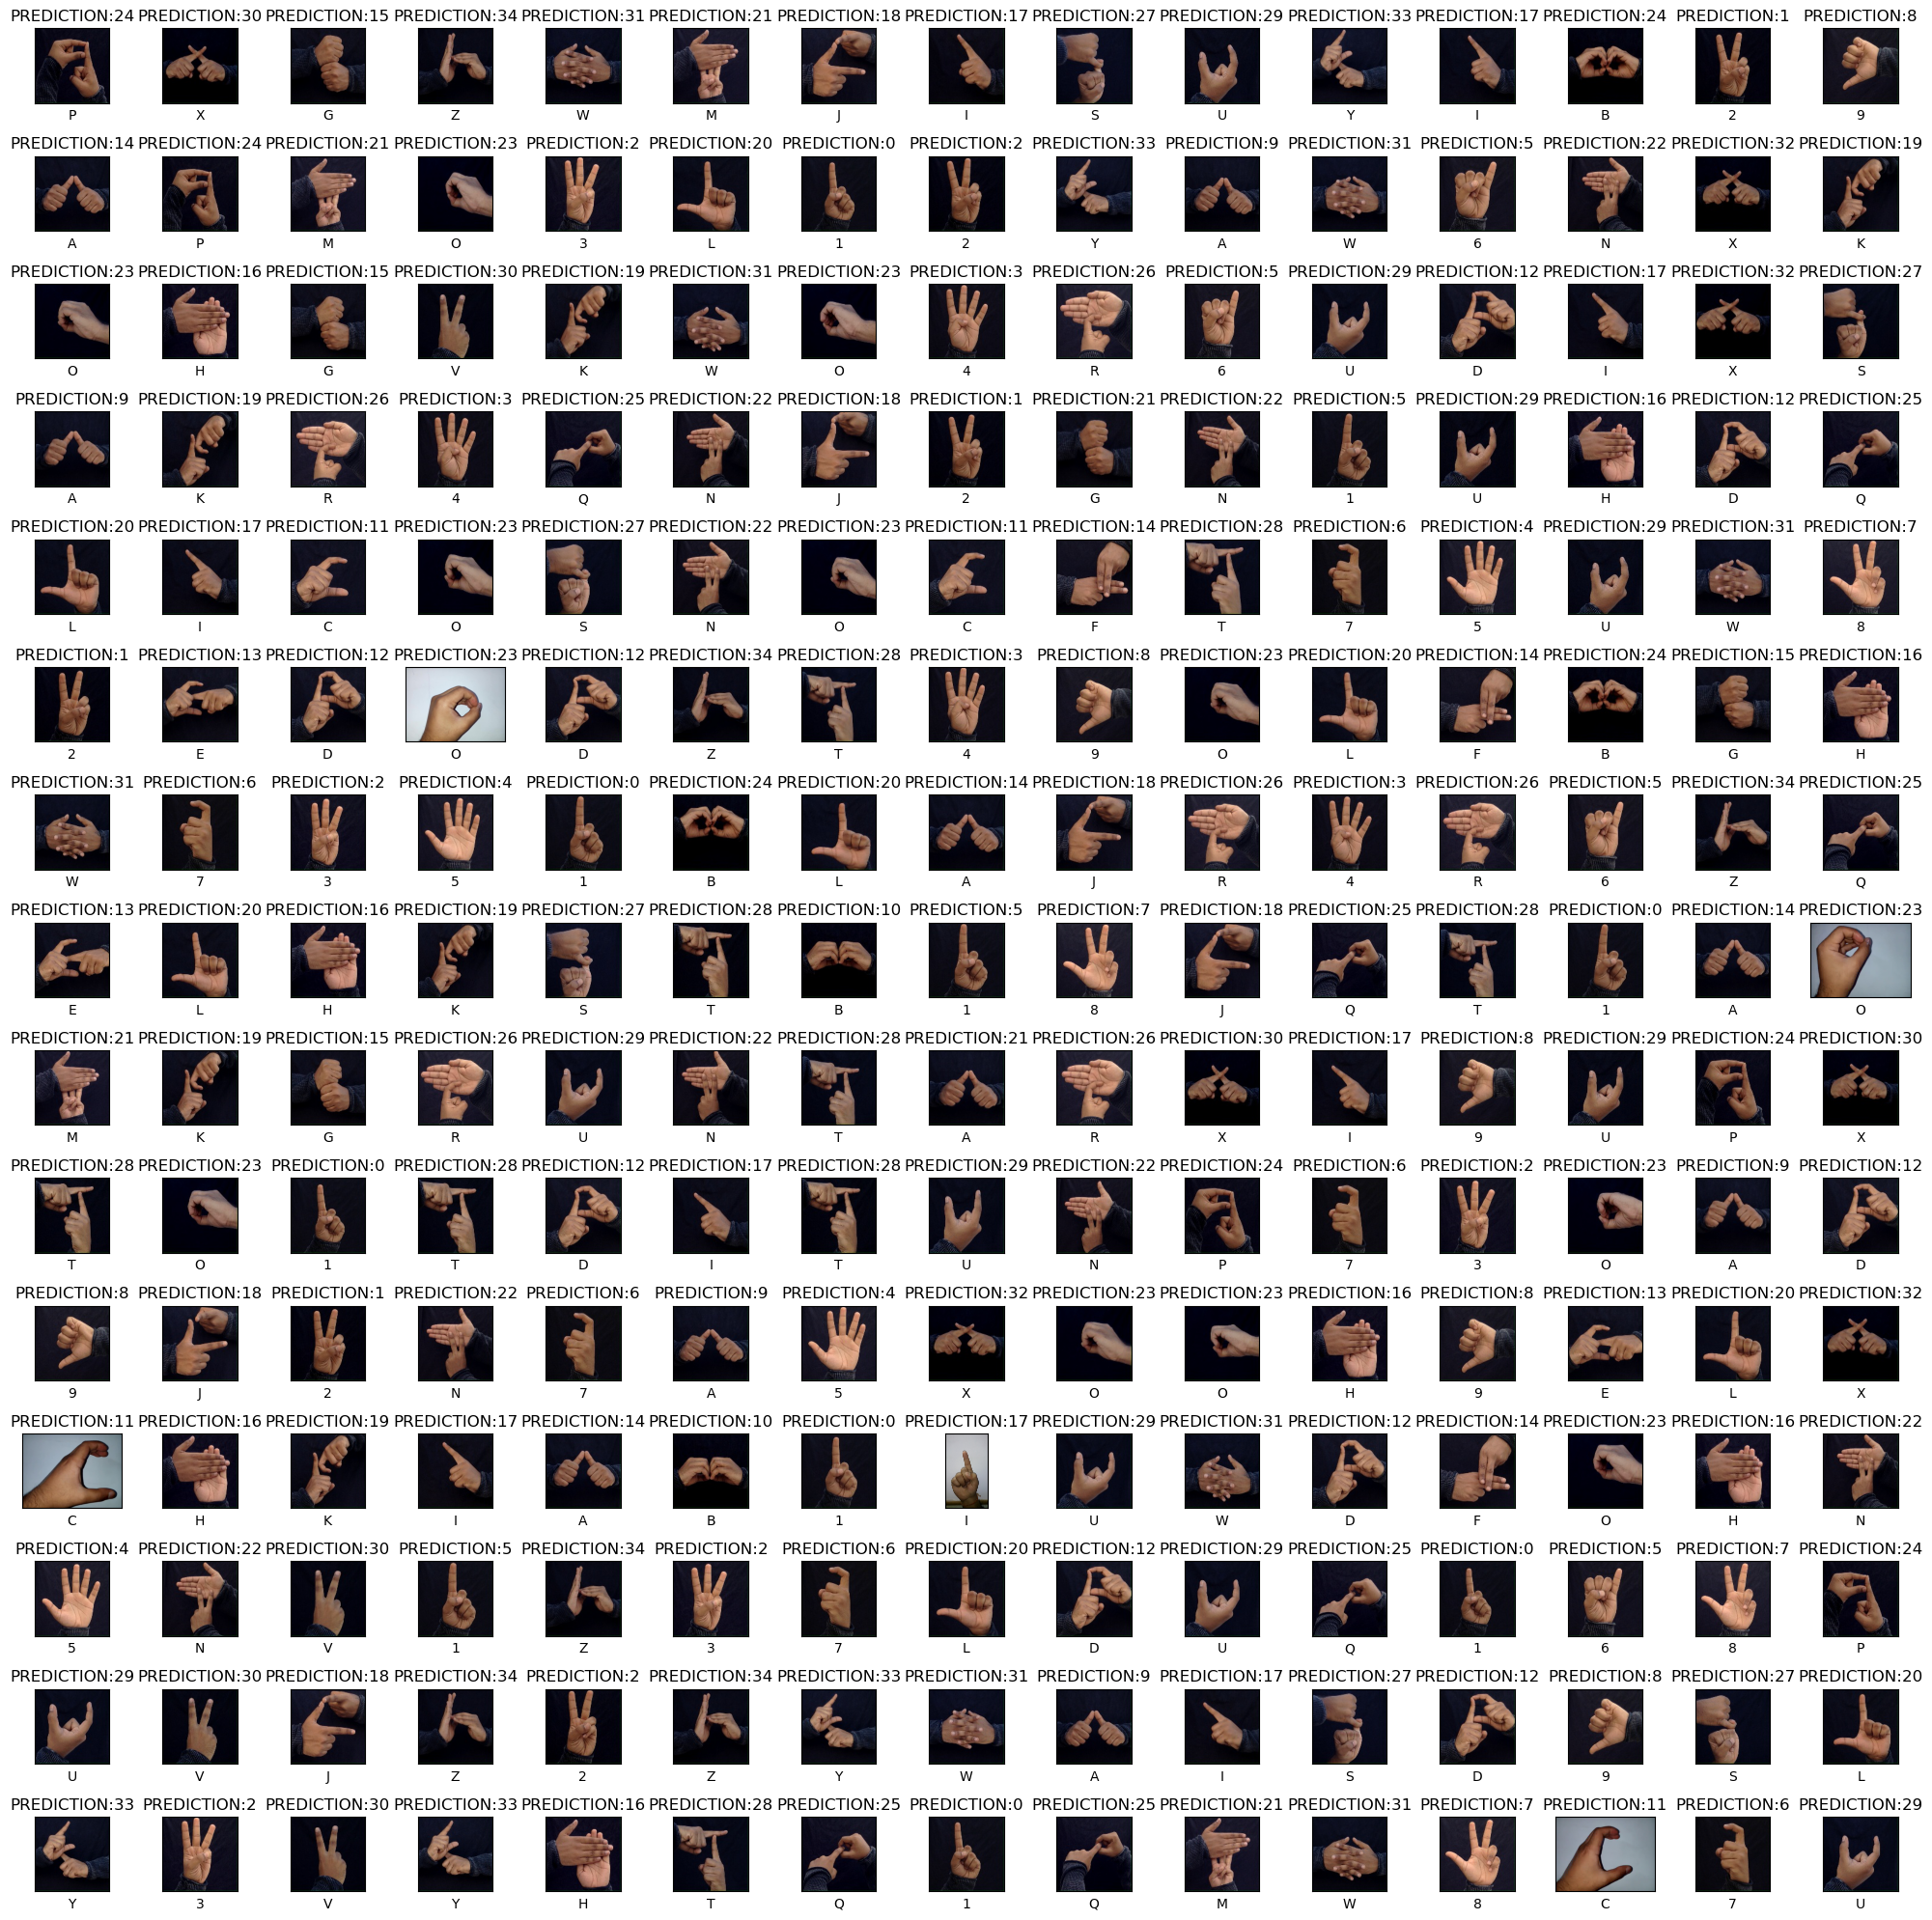

In [59]:
fig, axes = plt.subplots(nrows=15,
                         ncols=15,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(X_Test["JPG"].iloc[i]))
    ax.set_title(f"PREDICTION:{Model_Test_Prediction[i]}")
    ax.set_xlabel(X_Test["CATEGORY"].iloc[i])
plt.tight_layout()
plt.show()

In [60]:
Model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 24)   │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 24)   │            96 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 24)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 127, 127, 64)   │        13,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 31, 31, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 31, 31, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 31, 31, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 15, 15, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2352)           │    29,505,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 35)             │        82,355 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,467,771 (345.11 MB)

 Trainable params: 30,155,907 (115.04 MB)

 Non-trainable params: 48 (192.00 B)

 Optimizer params: 60,311,816 (230.07 MB)

In [ ]:
import numpy as np
import cv2
import tensorflow as tf

# Load your pre-trained model
model = tf.keras.models.load_model(r"C:\Users\HP\Downloads\Prediction_Model.h5")

# Define the correct input size that matches your model's expected input dimensions
input_height, input_width = 254, 254  # Adjusted to match the model's input shape
input_channels = 1  # Grayscale

# Define the mapping from index to letter
index_to_letter = {0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9',
                    9: 'A', 10: 'B', 11: 'C', 12: 'D', 13: 'E', 14: 'F', 15: 'G', 16: 'H',
                    17: 'I', 18: 'J', 19: 'K', 20: 'L', 21: 'M', 22: 'N', 23: 'O', 24: 'P',
                    25: 'Q', 26: 'R', 27: 'S', 28: 'T', 29: 'U', 30: 'V', 31: 'W', 32: 'X',
                    33: 'Y', 34: 'Z'}

# Open a connection to the webcam
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break
    
    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Resize the frame to match the input size of your model
    resized_frame = cv2.resize(gray_frame, (input_height, input_width))
    
    # Normalize the frame
    normalized_frame = resized_frame / 255.0
    
    # Reshape the frame to match the model's expected input shape
    input_frame = np.expand_dims(normalized_frame, axis=(0, -1))  # Ensure shape is (1, height, width, channels)

    # Make a prediction
    prediction = model.predict(input_frame)
    
    # Get the class label with the highest probability
    predicted_index = np.argmax(prediction)
    predicted_letter = index_to_letter.get(predicted_index, 'Unknown')

    # Display the resulting frame with the prediction
    cv2.putText(frame, f'Predicted Sign: {predicted_letter}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.imshow('Hand Gesture Recognition', frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close windows
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 